# sanity checks on `models.NMF` with emulator

In [1]:
import numpy as np 
from provabgs import models as Models

In [2]:
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# load NMF model and test the emulator without burst

In [3]:
m_nmf_fsps = Models.NMF(burst=False, emulator=False)
m_nmf_emul = Models.NMF(burst=False, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, gamma1_zh, gamma2_zh, dust1, dust2, dust_index
input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [4]:
# load test parameter and spectrum. These were generated for the validation of the trained Speculator model
test_w = np.load('/Users/chahah/data/provabgs/emulator/wave.nmf.npy')

test_theta = np.load('/Users/chahah/data/provabgs/emulator/fsps.nmf.v0.1.theta.test.npy')[:100]
test_logspec = np.load('/Users/chahah/data/provabgs/emulator/fsps.nmf.v0.1.lnspectrum.test.npy')[:100]

(3000.0, 10000.0)

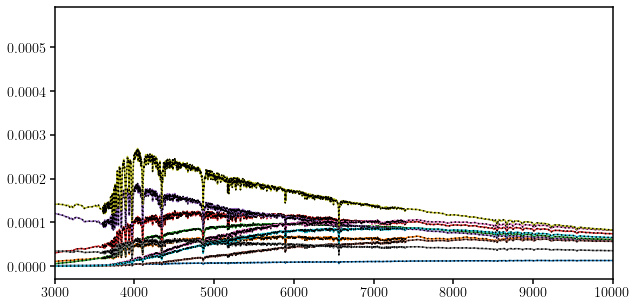

In [5]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for igal in np.random.choice(range(100), size=10, replace=False): 
    w, f = m_nmf_emul._sps_model(np.concatenate([[0.], test_theta[igal][1:-1]]), test_theta[igal][-1])
    sub.plot(w, f)
    sub.plot(test_w, np.exp(test_logspec[igal]), c='k', ls=':')
sub.set_xlim(3e3, 1e4)

In [6]:
%timeit m_nmf_emul._sps_model(np.concatenate([[0.], test_theta[0][1:-1]]), test_theta[0][-1])

2.32 ms ± 60.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


(3000.0, 10000.0)

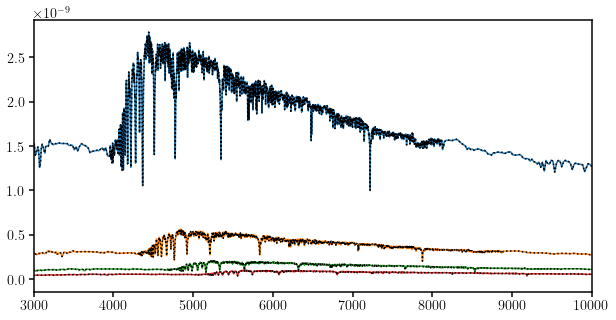

In [7]:
igal = 0

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for zred in [0.1, 0.2, 0.3, 0.4]: 
    w, f = m_nmf_emul.sed(test_theta[igal][:-1], zred)
    sub.plot(w, f)
    w, f = m_nmf_fsps.sed(test_theta[igal][:-1], zred)
    sub.plot(w, f, c='k', ls=':')
sub.set_xlim(3e3, 1e4)

# now with the burst component turned on

In [8]:
m_nmf_fsps = Models.NMF(burst=True, emulator=False)
m_nmf_emul = Models.NMF(burst=True, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index
input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [9]:
test_w = np.load('/Users/chahah/data/provabgs/emulator/wave.burst.npy')

test_theta = np.load('/Users/chahah/data/provabgs/emulator/fsps.burst.v0.1.theta.test.npy')[:100]
test_logspec = np.load('/Users/chahah/data/provabgs/emulator/fsps.burst.v0.1.lnspectrum.test.npy')[:100]

(3000.0, 10000.0)

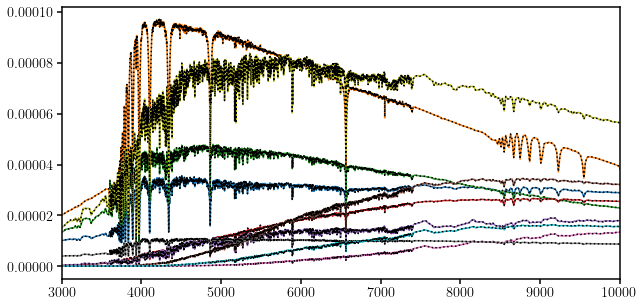

In [10]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for igal in np.random.choice(range(100), size=10, replace=False): 
    f = m_nmf_emul._emu_burst_(test_theta[igal])
    sub.plot(m_nmf_emul._nmf_emu_waves, np.exp(f))
    sub.plot(test_w, np.exp(test_logspec[igal]), c='k', ls=':')
sub.set_xlim(3e3, 1e4)

In [11]:
%timeit m_nmf_emul._emu_burst_(test_theta[0])

5.96 ms ± 460 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# lets try running the SED

(3000.0, 10000.0)

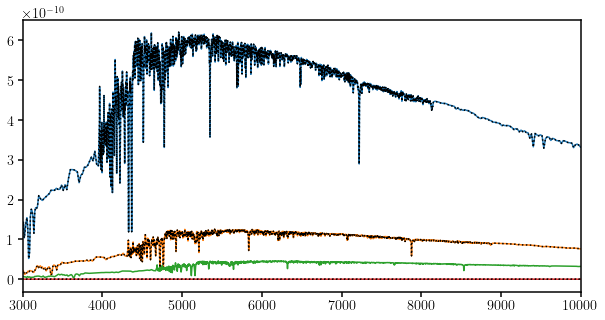

In [12]:
igal = 0
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for zred in [0.1, 0.2, 0.3, 0.4]: 
    _theta = np.array([0., 1., 0., 0., 0., 1., 10., 2e-4, 2e-4, 0., 0., 0.])
    w, f = m_nmf_emul.sed(_theta, zred)
    sub.plot(w, f)

    w, f = m_nmf_fsps.sed(_theta, zred)
    sub.plot(w, f, c='k', ls=':')
sub.set_xlim(3e3, 1e4)

(6000.0, 7500.0)

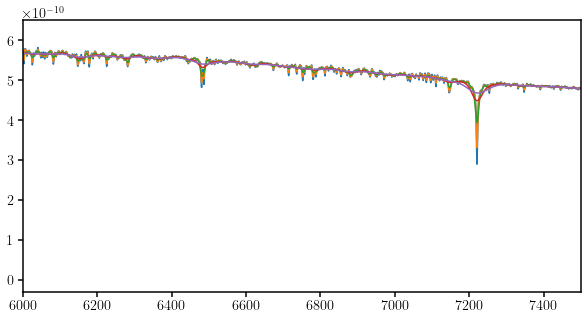

In [13]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for vdisp in [0., 50, 150, 500, 1000]: 
    _theta = np.array([0., 1., 0., 0., 0., 1., 10., 2e-4, 2e-4, 0., 0., 0.])
    w, f = m_nmf_emul.sed(_theta, 0.1, vdisp=vdisp)
    sub.plot(w, f)
sub.set_xlim(6000, 7500)